# 1. JULIA PROGRAMMING TUTORIAL

## 1.1. INDUCTANCE OF COMPOSITE CONDUCTOR LINES INDUCTANCE NEGLECTING GROUND CABLES AND GROUND RESISTIVITY

\begin{align}
  L = \frac{\lambda}{I}
\end{align}

where $L$ refers to inductance; $\lambda$ is the linked flux; and $I$ refers to the current through the conductor.

### 1.1.1 Assumptions and considerations
<ol>
  <li> Conductor Y is the return circuit for the current in conductor X</li>
  <li> All the strands of each conductor are identycal cylindrical filaments and carry the same current.</li>
</ol>


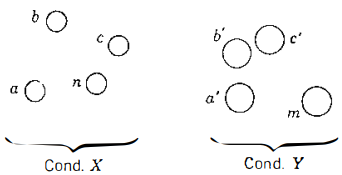



The flux linkages for the filament "a" are:

\begin{align}
  \lambda_{a} = 2 \times 10^{-7} \times I \times ln(\frac{( D_{aa'}D_{ab'}D_{ac'}...D_{am} )^{1/m}}{ (r_{a'}D_{ab}D_{ac}...D_{an})^{1/n} })
\end{align}
where $r_{a'} =  r_{a} \times \frac{1}{e^{1/4}} \approx 0.7788 \times r_{a}$

Regarding that the curret through filament a is $I_a=I/n$, Consequently the inductance:

\begin{align}
  L_{a} = 2n \times 10^{-7} \times ln(\frac{( D_{aa'}D_{ab'}D_{ac'}...D_{am} )^{1/m}}{ (r_{a'}D_{ab}D_{ac}...D_{an})^{1/n} })
\end{align}

The inductance of conductor "X" can be expressed as:

\begin{align}
  L_{X} = \frac{L_{av}}{n} = \frac{L_a+L_b+L_c+...+L_n}{n^2}
\end{align}

This results in:

\begin{align}
  L_{X} = 2 \times 10^{-7} \times ln( \frac{ [ ( D_{aa'}D_{ab'}D_{ac'}...D_{am} ) ( D_{ba'}D_{bb'}D_{bc'}...D_{bm} )...( D_{na'}D_{nb'}D_{nc'}...D_{nm} ) ]^{1/(mn)} }{ [ (r_{a'}D_{ab}D_{ac}...D_{an})(D_{ba}r_{b'}D_{bc}...D_{bn})...(D_{na}D_{nb}D_{nc}...r_{n'}) ]^{n^2} })
\end{align}

where
\begin{align}
  GMD = [ ( D_{aa'}D_{ab'}D_{ac'}...D_{am} ) ( D_{ba'}D_{bb'}D_{bc'}...D_{bm} )...( D_{na'}D_{nb'}D_{nc'}...D_{nm} ) ]^{1/(mn)} 
\end{align}

\begin{align}
  GMR = [ (r_{a'}D_{ab}D_{ac}...D_{an})(D_{ba}r_{b'}D_{bc}...D_{bn})...(D_{na}D_{nb}D_{nc}...r_{n'}) ]^{n^2} 
\end{align}

Therefore:

\begin{align}
  L_{X} = 2 \times 10^{-7} \times ln(\frac{GMD}{GMR} )
\end{align}

Finally the inductance of the line: 

\begin{align}
  L = L_{X} + L_{Y}
\end{align}


### 1.1.2. CALCULATIONS (Example 4.2 - Stevenson Book - p. 158)

One circuit of a single-phase transmission line is composed of three solid O.2S-cm-radius wires. The return circuit is composed of two O.S-em-radius wires. The arrangement of conductors is shown in Fig. 4.9. 
Find the inductance due to the current in each side of the line and the inductance of the complete line in henrys per meter (and in millihenrys per mile).

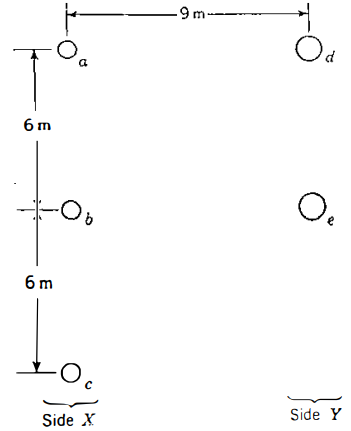

In [1]:
using LinearAlgebra
#FUNCTIONS
function get_distance_p1p2( P1, P2 )
    return sqrt( ( P1[1] - P2[1] )^2 + ( P1[2] - P2[2] )^2 )
end
function get_distance_xy( X, Y )
    return sqrt( ( X[1] - X[2] )^2 + ( Y[1] - Y[2] )^2 )
end

function get_GMD( X1, Y1, X2, Y2 )
    GMD = 1
    n   = length( X1 )
    m   = length( X2 )
    for i = 1 : n
        for j = 1 : m
            GMD = GMD * get_distance_p1p2( [ X1[i] Y1[i] ], [ X2[j] Y2[j] ] )
            #print(i , "\t" , j , "\t", GMD, "\n")
        end
    end
    return GMD^( 1 / (n * m) )
end

function get_GMR_xy( X1, Y1, r, K_gmr=1/exp(1/4) )
    #K_gmr = 1/exp(1/4)    # This is for solid/compact conductors. For Stranded see IEC 60287-1-3
    GMR   = 1
    n     = length( X1 )
    for i = 1 : n
        for j = 1 : n
            if i == j 
                GMR = GMR * ( K_gmr ) * r
                continue
            end
            GMR = GMR * get_distance_p1p2( [ X1[i] Y1[i] ], [ X1[j] Y1[j] ] )
            #print(i , "\t", j , "\t" , GMR, "\n")
        end
    end
    return GMR^( 1 / (n * n) )
end

#FUNCTION TO WRITE???
function get_GMR_nd( n, d, r, K_gmr=1/exp(1/4) )
    #K_gmr = 1/exp(1/4)    # This is for solid/compact conductors. For Stranded see IEC 60287-1-3
    GMR   = 1
    for i = 1 : n
        for j = 1 : n
            if i == j 
                GMR = GMR * ( K_gmr ) * r
                continue
            end
            if j == 4
                GMR = GMR * 
                continue
            end
            GMR = GMR * d
            #print(i , "\t", j , "\t" , GMR, "\n")
        end
    end
    return GMR^( 1 / (n * n) )
end

function get_Lx( GMD, GMR, μ_r=1 )
    μ = 4 * π * 10^(-7) * μ_r
    return μ / ( 2*π ) * log( (GMD)/(GMR) )
end

#Input Data
    #Conductor X - coordinates in [m]
X_1 = [ -4.5 -4.5 -4.5 ]  #Elements separated by "," gives a vector; by space gives a matrix
Y_1 = [ 12.0  6.0  0.0 ] 
r_1 = 0.25 * ( 1/100 )
    #Conductor B
X_2 = [ 4.5  4.5 ]
Y_2 = [ 12.0 6.0 ]
r_2 = 0.5 * ( 1/100 )

#Calculations
n   = length(X_1)
m   = length(X_2)
m_n = m * n

GMD   = get_GMD( X_1, Y_1, X_2, Y_2 )
GMR_1 = get_GMR_xy( X_1, Y_1, r_1 )
GMR_2 = get_GMR_xy( X_2, Y_2, r_2 )

L_1   = get_Lx( GMD, GMR_1 , 1 )
L_2   = get_Lx( GMD, GMR_2 , 1 )
L = L_1 + L_2

1.4717629728153221e-6

## 1.2. THREE-PHASE LINES CALCULATIONS
### 1.2.1. Unsymmetrical spacing - Example 4.4 Stevenson - p 163
A single circuit three-phase line operated at 60 Hz is arranged, as shown in Fig. 4.12. The conductors are ACSR Drake. Find the inductive reactance per mile per phase.
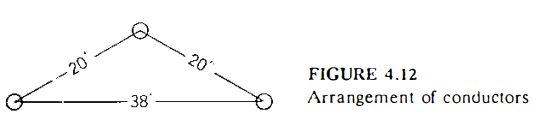

In [2]:
using Combinatorics

function get_all_distances( Xc_v , Yc_v )
    n_cond = length( Xc_v )
    n_dist = round( Int , ( factorial(n_cond) ) / ( factorial(2) * factorial(n_cond - 2) ) )#N distance/combinations
    D_v    = zeros( 1 , n_dist)
    iter   = combinations( collect(1:n_cond), 2 )
    i      = 1
    for idx_v in iter
        D_v[i] = get_distance_xy( Xc_v[idx_v] , Yc_v[idx_v] )
        i = i+1
    end
    return D_v, iter
end

function get_Deq( D_v )
    n   = length( D_v )
    Deq = 1
    for i=1 : n
        Deq = Deq * D_v[i]
    end
    return Deq^( 1/n )
end

function get_regpoly_xcoord( n , d)
    r_bund = d / ( 2 * sin( π/n ) )
    angles = [2π * k / n for k in 0:(n-1)]
    return [r_bund * cos(θ) for θ in angles]
end
function get_regpoly_ycoord( n , d)
    r_bund = d / ( 2 * sin( π/n ) )
    angles = [2π * k / n for k in 0:(n-1)]
    return [r_bund * sin(θ) for θ in angles]
end

function get_regpoly_xy_coord( n , d)
    x_coords = Float64[]
    y_coords = Float64[]

    radius = d / ( 2 * sin( π/n ) )
    angle_increment = 2 * π / n

    for i in 0:(n-1)
        angle = i * angle_increment
        push!(x_coords, radius * cos(angle))
        push!(y_coords, radius * sin(angle))
    end

    return x_coords, y_coords
end


# Input
Xabc = [-19 0 19]
aa   = sqrt(20^2 - 19^2)
Yabc = [  0 aa 0]
r_drake_m = ( 1.107/2 ) * ( 25.4 / 1 ) * ( 1 / 1000 )   #(( D/2 ) * ( mm / in ) * ( mm / m ))
r_drake_ft = ( 1.107/2 ) * ( 1 / 12 )                   #(( D/2 ) * ( ft / in ) )

GMR_drake_m  = get_GMR_xy( Xabc[1], Yabc[1], r_drake_m )
GMR_drake_ft = get_GMR_xy( Xabc[1], Yabc[1], r_drake_ft, 0.768 )  
GMR_drake_ft2= GMR_drake_m * ( 3.28084 / 1 )

GMR_drake_t  = 0.0373                                   #ft 
println( GMR_drake_ft, '\t', GMR_drake_ft2, '\t' ,GMR_drake_t )

D_v, comb = get_all_distances( Xabc , Yabc )
println( D_v )
Deq = get_Deq( D_v )
println( Deq )
Deq = ( 20 * 20 * 38 )^( 1 / 3 )
println( Deq )

#BUNDLED CONDUCTORS EXAMPLE.
r_pheasant = 1.381 * 0.5 * (25.4 / 1) * (1/1000) #m
d_bund     = 0.45 #m
n_bund     = 4
Xbund      = get_regpoly_xcoord( n_bund , d_bund )
Ybund      = get_regpoly_ycoord( n_bund , d_bund )
println( "Coordenadas:\n", Xbund, "\t", Ybund )
gmr_bund   = get_GMR_xy( Xbund, Ybund, r_pheasant )
println(gmr_bund)
Xbund, Ybund = get_regpoly_xy_coord( n_bund , d_bund)
println( Xbund, "\t", Ybund )
#gmr_bund4  = 1.09050773267*( r_pheasant*(1/exp(1/4))*d_bund^3 )^(1/4)


0.035424	0.035922187268678504	0.0373
[20.0 38.0 20.0]
24.77124659260341
24.77124659260341
Coordenadas:
[0.3181980515339464, 1.94840112652986e-17, -0.3181980515339464, -5.84520337958958e-17]	[0.0, 0.3181980515339464, 3.89680225305972e-17, -0.3181980515339464]
0.20483024268347094
[0.3181980515339464, 1.94840112652986e-17, -0.3181980515339464, -5.84520337958958e-17]	[0.0, 0.3181980515339464, 3.89680225305972e-17, -0.3181980515339464]


## 1.3. CALCULATIONS CONSIDERING BUNDLING

# 2 Example 4.1 Kersting
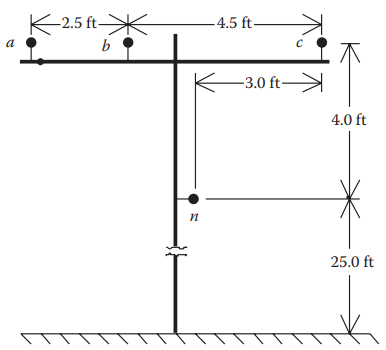

An overhead three-phase distribution line is constructed as shown in Figure 4.7. 
Determine the phase impedance matrix and the positive and zero sequence of the line. 
The phase conductors are 336,400 26/7 ACSR (Linnet),
and the neutral conductor is 4/0 6/1 ACSR.

From the table of standard conductor data (Appendix A), it is found that
336,400 26/7 ACSR:  GMR = 0.0244ft
                    Resistance = 0.306Ω/mile
4/0 6/1 ACSR:       GMR = 0.00814ft
                    Resistance = 0.5920Ω/mile

In [5]:
function get_primitive_z_matrix( comb, distance_v, res_v, GMR_v, index_c, rho=100.0, freq=60.0 )
    n_cond      = length( index_c )
    z_primitive = zeros( ComplexF64, n_cond, n_cond )
    #out diagonal
    j = 1
    for i in comb
        z_primitive[i[1] , i[2]] = 0.00158836*freq + ( 0.00202237*freq*( log(1/distance_v[j]) + 7.6786 + 0.5*log(rho/freq) ) )*im
        z_primitive[i[2] , i[1]] = z_primitive[i[1] , i[2]]
        j = j + 1
    end
    #diagonal
    for i = 1:n_cond
        z_primitive[i , i] = res_v[ index_c[i] ] + 0.00158836*freq + ( 0.00202237*freq*( log(1/GMR_v[ index_c[i] ]) + 7.6786 + 0.5*log(rho/freq) ) )*im
    end
    return z_primitive
end

function get_kron_reduced_z_matrix( z_primitive, index_c )
    n_ct   = length( index_c )
    n_ph1  = count(x -> x == 1, index_c)
    n_gc   = count(x -> x == 2, index_c)
    n_ph2  = count(x -> x == 3, index_c)

    Zph_ph = z_primitive[ 1         : n_ph1       , 1         : n_ph1 ]
    Zph_g  = z_primitive[ 1         : n_ph1       , n_ph1 + 1 : n_ph1 + n_gc ]
    Zg_ph  = z_primitive[ n_ph1 + 1 : n_ph1 + n_gc, 1         : n_ph1 ]
    Zg_g   = z_primitive[ n_ph1 + 1 : n_ph1 + n_gc, n_ph1 + 1 : n_ph1 + n_gc ]

    return Zph_ph - ( Zph_g * inv(Zg_g) * Zg_ph )
end

function get_sequence_z_matrix( z_kron )
    a      = cos(2*π/3)  + sin(2*π/3)im
    a2     = cos(-2*π/3) + sin(-2*π/3)im
    T_SEQ  = [ 1  1  1;
               1 a2  a;
               1  a  a2 ]
    IT_SEQ = (1/3)* [ 1  1  1;
                      1  a  a2;
                      1 a2  a ]
    return IT_SEQ * z_kron * T_SEQ

end

linnet_GMR = 0.0244     #ft
linnet_res = 0.306      #ohm/mile
ground_c_GMR = 0.00814  #ft
ground_c_res = 0.5920   #ohm/mile

freq         = 60       #Hz
g_resistiv   = 100      #Ohm/m

X_abcn  = [ 0  2.5 7  4 ]
Y_abcn  = [ 29 29 29 25 ]
index_c = [  1  1  1  2 ]

GMR_v   = [ linnet_GMR, ground_c_GMR ]
res_v   = [ linnet_res, ground_c_res ]


D_v_k, comb = get_all_distances( X_abcn , Y_abcn )
println(  "distances: ", D_v_k, "\nCombinations: ", collect(comb) )

z_m = get_primitive_z_matrix( comb, D_v_k, res_v, GMR_v, index_c, 100.0, 60.0 )
println(z_m)
z_kron = get_kron_reduced_z_matrix( z_m, index_c )
z_seq  = get_sequence_z_matrix( z_kron )

distances: [2.5 7.0 5.656854249492381 4.5 4.272001872658765 5.0]
Combinations: [[1, 2], [1, 3], [1, 4], [2, 3], [2, 4], [3, 4]]
ComplexF64[0.4013016 + 1.4132950466793046im 0.0953016 + 0.8515458361768486im 0.0953016 + 0.7266095509333691im 0.0953016 + 0.7524605598897163im; 0.0953016 + 0.8515458361768486im 0.4013016 + 1.4132950466793046im 0.0953016 + 0.7802225091269629im 0.0953016 + 0.7865316794351517im; 0.0953016 + 0.7266095509333691im 0.0953016 + 0.7802225091269629im 0.4013016 + 1.4132950466793046im 0.0953016 + 0.7674378323639077im; 0.0953016 + 0.7524605598897163im 0.0953016 + 0.7865316794351517im 0.0953016 + 0.7674378323639077im 0.6873016 + 1.546503658654026im]


3×3 Matrix{ComplexF64}:
   0.773513+1.93729im    0.0255607+0.0114936im   -0.0320858+0.0158933im
 -0.0320858+0.0158933im    0.30607+0.627012im    -0.0722517-0.00602737im
  0.0255607+0.0114936im  0.0723042-0.00589762im     0.30607+0.627012im